In [3]:
%matplotlib inline

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import distributions
from scipy import integrate

Beta with Uninformative Prior

In [54]:
import numpy as np
from scipy import integrate
from scipy.stats import distributions
class_1 = distributions.beta(a=1 + 9, b=1 + 1)
class_2 = distributions.beta(a=1 + 8, b=1 + 2)
class_3 = distributions.beta(a=1 + 3, b=1 + 7)
def prop_overlap(*args, granularity = 1000):
    args = args[0]
    class_pdfs = [cls.pdf(np.linspace(0,1,granularity)) for cls in args]
    class_pdfs = np.stack([cls / cls.sum() for cls in class_pdfs]).T
    return integrate.trapz(class_pdfs.min(axis=1))
prop_overlap([class_1, class_2, class_3], granularity=1000)

0.059489675707156769

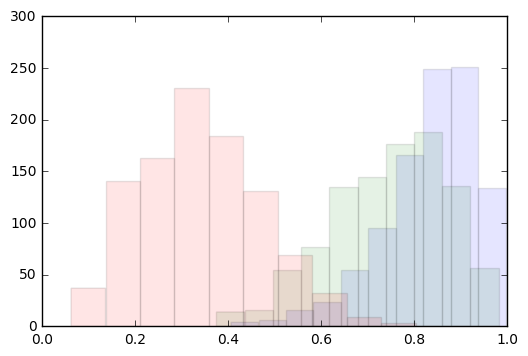

In [56]:
plt.hist(class_1.rvs(1000), alpha=0.1)
plt.hist(class_2.rvs(1000), alpha=0.1)
plt.hist(class_3.rvs(1000), alpha=0.1)
plt.show()

In [ ]:
import numpy as np
from scipy import integrate
from scipy.stats.distributions import beta
def proportion_overlap(*args, granularity = 1000):
    args = args[0]
    class_pdfs = [cls.pdf(np.linspace(0,1,granularity)) for cls in args]
    class_pdfs = np.stack([cls / cls.sum() for cls in class_pdfs]).T
    return integrate.trapz(class_pdfs.min(axis=1))

def posterior_overlap(actual, pred, labels, granularity=1000):
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
    tp_fn = []
    confusion = metrics.confusion_matrix(actual, pred)
    for i in range(confusion.shape[0]):
        tp = confusion[i,i]
        fn = np.delete(confusion[i,:], i).sum()
        tp_fn.append((tp, fn))
    betas = [beta(a=1 + tp, b = 1 + fn) for tp, fn in tp_fn]
    for i, beta_dist in enumerate(betas):
        random_draws = beta_dist.rvs(granularity)
        plt.hist(random_draws, alpha=0.2, color=colors[i], bins=np.linspace(0,1, 100))
        plt.vlines(random_draws.mean(), 0, 200, label=labels[i], color=colors[i], linestyles="dotted")
    plt.legend(loc="upper left")
    plt.show()
    return proportion_overlap(betas, granularity)
# actual=np.array([1,1,0,0,2,1,2])
# pred=np.array([0,1,0,0,2,1,1])
# np.log(posterior_overlap(actual, pred))

# SCRAPBOOK

In [99]:
import seaborn as sns
def posterior_overlap(actual, pred, labels, granularity=1000):
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
    tp_fn = []
    confusion = np.array([[450, 21, 29], [8, 70, 22], [53, 27, 20]])
    for i in range(confusion.shape[0]):
        tp = confusion[i,i]
        fn = np.delete(confusion[i,:], i).sum()
        tp_fn.append((tp, fn))
    betas = [beta(a=1 + tp, b = 1 + fn) for tp, fn in tp_fn]
    for i, beta_dist in enumerate(betas):
        random_draws = beta_dist.rvs(granularity)
        plt.hist(random_draws, alpha=0.2, color=colors[i], bins=np.linspace(0,1, 100))
        plt.vlines(random_draws.mean(), 0, 3000, label=labels[i], color=colors[i], linestyles="dotted")
    plt.legend(loc="upper left")
    plt.show()
actual=np.array([1,1,0,0,2,1,2])
pred=np.array([0,1,0,0,2,1,1])

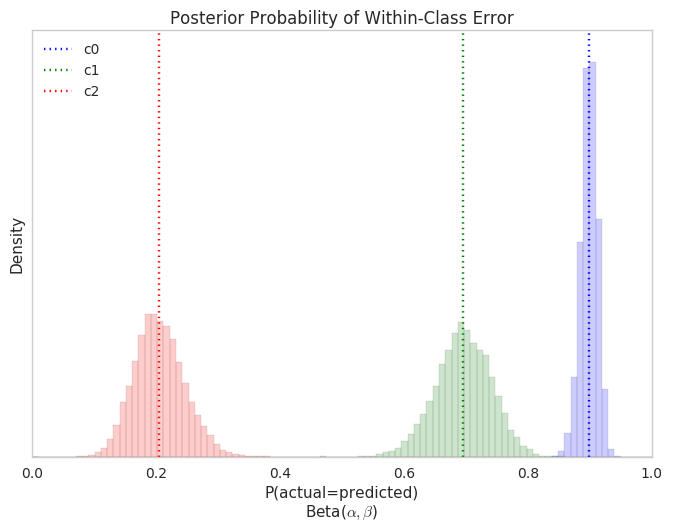

In [100]:
sns.set_style("whitegrid")
plt.title("Posterior Probability of Within-Class Error")
plt.xlabel('P(actual=predicted)\n' + r'Beta($\alpha, \beta$)')
plt.ylabel("Density")
plt.yticks([])
ax = plt.gca()
ax.grid(False)

posterior_overlap(actual, pred, labels=["c0", "c1", "c2"], granularity=10000)

In [ ]:
import seaborn as sns
from scipy.stats.distributions import beta
def posterior_overlap_eval(actual, pred, labels, granularity=10000):
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k')
    tp_fn = []
    confusion = metrics.confusion_matrix(actual, pred)
    for i in range(confusion.shape[0]):
        tp = confusion[i,i]
        fn = np.delete(confusion[i,:], i).sum()
        tp_fn.append((tp, fn))
    betas = [beta(a=1 + tp, b = 1 + fn) for tp, fn in tp_fn]
    for i, beta_dist in enumerate(betas):
        random_draws = beta_dist.rvs(granularity)
        plt.hist(random_draws, alpha=0.2, color=colors[i], bins=np.linspace(0,1, 100))
        plt.vlines(random_draws.mean(), 0, 2000, label=labels[i], color=colors[i], linestyles="dotted")
    plt.legend(loc="upper left")
    plt.show()